<a href="https://colab.research.google.com/github/smarcondes-ds/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Roma

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados nessa análise foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para iniciarmos a analise exploratória será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv")


## Análise dos Dados

A etapa em questão tem como finalidade criar conhecimento da situação inicial e permitir a compreensão de como os dados coletados estão organizados dentro do *dataset*.


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando prosseguimento, iremos identificar a quantidade de entradas que nosso conjunto de dados possui e ver quais os tipos de colunas existentes.

In [6]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

Entradas:	 31215
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade de valores ausentes *(valores missing)* influencia diretamente a qualidade do conjunto de dados e por consequencia a analise a ser realizada.

Entendermos os impactos desses valores ausentes diante do total de entradas existentes no *dataset* faz com que tenhamos compreensão melhor dos dados apresentados.

No dataset em questão podemos observar as seguintes situações com relação aos valores missing:

* A colunha `neighbourhood_group` possui 100% dos seus valores faltantes
* As variaveis `reviews_per_month` e `last_review` possuem aproximadamente 20% de valores ausentes
* A variável `name` tem perto de 0,3% de valores missing.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para visualização da distribuição das variáveis, será plotado o histograma

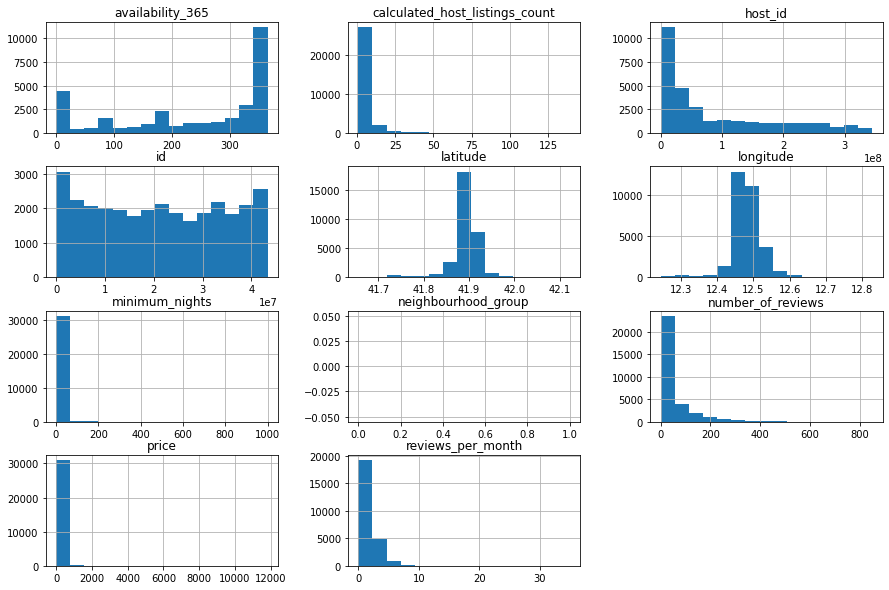

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição apresentada nos histogramas acima, é possivel identificar vestigios da presença de *outliers*. Olhando as variáveis `minimum_nights`, `price` e `calculated_host_listings_count`. 

Os números não seguem uma distribuição, distorcendo o gráfico e por consequencia a analise a ser realizada.

Existe duas maneiras que ajudam a detecção de outliers:

* Resumo estatístico através do método `describe()`
* Plotar `boxplots` para cada variável


In [9]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31215.000000,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,43.126862,1.460446,7.181643,235.998270
std,276.420392,15.307859,70.042274,1.518958,16.905015,132.775951
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.280000,1.000000,124.000000
50%,75.000000,2.000000,12.000000,0.930000,2.000000,293.000000
75%,115.000000,3.000000,55.000000,2.220000,6.000000,357.000000
max,11818.000000,1000.000000,850.000000,34.960000,139.000000,365.000000



Observando o quadro estatistico acima, podemos afirmar dos dados mais relevantes para a analise em questão que:

* A variável `price` possui em 75% do dataset analisado valores iguais ou inferior a 115, entretanto existem valores máximos 11818.
* O atributo minimum_nights em 75% dos valores demonstrados possui os números iguais ou inferiores a 3, porém existem valores máximos acima de 365 Dias.

#### Boxplot para minimum_nights

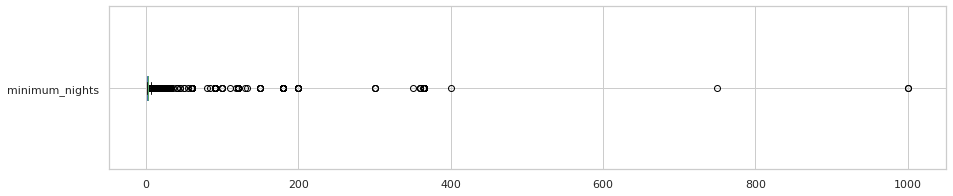

minimum_nights: valores acima de 6.0
1117 entradas
3.5784%


In [102]:
# Identificando os pontos de outliers a variavel minimun_nights

q1mn = float(df.minimum_nights.quantile([0.25]))
q3mn = float(df.minimum_nights.quantile([0.75]))
fiqmn = q3mn - q1mn
otbxmn = q1mn - 1.5 * fiqmn
otalmn = q3mn + 1.5 * fiqmn

#Boxplot para a variavel minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver a quantidade de Valores Acima de 6 Dias para minimum_nights

print('minimum_nights: valores acima de ' + str(otalmn))
print('{} entradas'.format(len(df[df.minimum_nights > otalmn])))
print('{:.4f}%'.format((len(df[df.minimum_nights > otalmn]) / df.shape[0])*100))

#### Boxplot para price

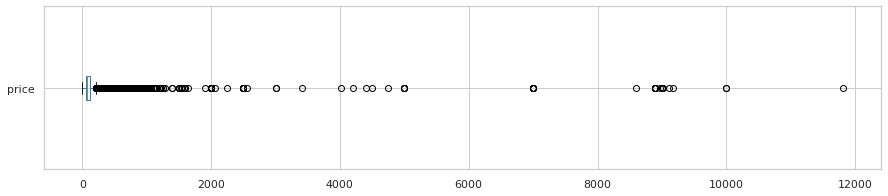


price: valores acima de 212.5
2153 entradas
6.8973%


In [100]:
# Identificando os Outliers da Coluna price

q1pr = float(df.price.quantile([0.25]))
q3pr = float(df.price.quantile([0.75]))
fiqpr = q3pr - q1pr
otbxpr = q1pr - 1.5 * fiqpr
otalpr = q3pr + 1.5 * fiqpr

# Boxplot para a variavel price

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver a quantidade de Valores Acima de 212,50 para price

print('\nprice: valores acima de ' + str(otalpr))
print('{} entradas'.format(len(df[df.price > otalpr])))
print('{:.4f}%'.format((len(df[df.price > otalpr]) / df.shape[0])*100))

Para identificação dos pontos de dados outliers, utilizei uma regra bastante usada na estátistica que é quando o resultado de 1.5 * FIQ (Faixa InterQuartil) está acima do terceiro quartil (Outliers Altos) ou abaixo do primeiro quartil (Outliers Baixos) são considerados pontos fora da curva.

#### Histograma sem outliers

Após indenficarmos dados outliers nas variáveis `price`e `minimum_nights`, iremos realizar a limpeza do DataFrame e realizar a plotagem do histograma novamente.

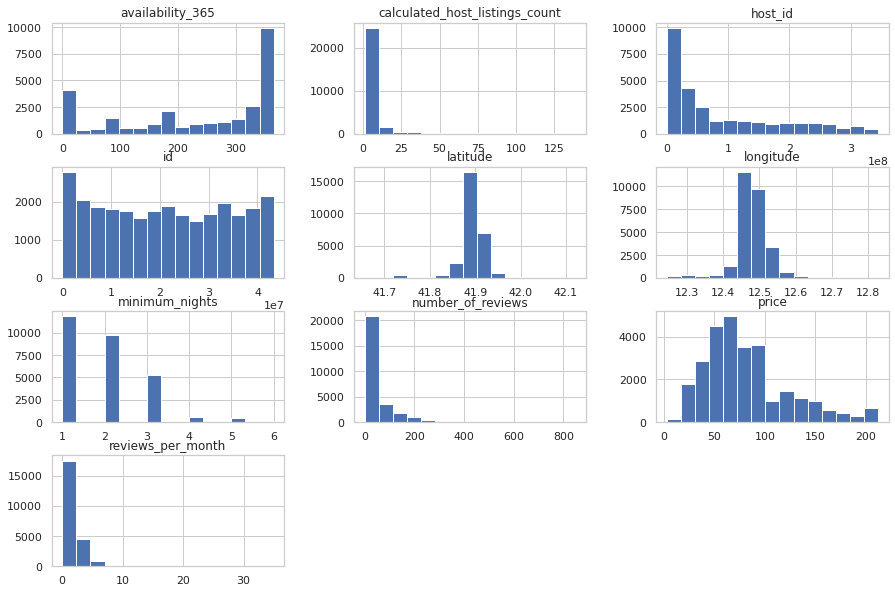

In [90]:
# Realizar a remoção dos Outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > otalpr].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > otalmn].index, axis=0, inplace=True)

# Remover neighbourhood_group pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Após a retirada dos dados outliers do DataSet analisado, observamos abaixo que a média de preço praticado (`price`) das diarias na cidade de Roma através da plataforma do Airbnb é de aproximadamente 81,40 sendo qus 50% dos dados analisados estão igual ou abaixo de 70,00.

In [96]:
# ver a média da coluna `price`
df_clean[['price']].describe()

,price
count,27998.000000
mean,81.399421
std,42.317222
min,3.000000
25%,50.000000
50%,70.000000
75%,100.000000
max,212.000000


### **Q6. Qual a correlação existente entre as variáveis**

A analise da correlação tem por objetivo verificar a existência de relação ou semelhança entre duas variáveis.

Essa relação pode ser medida através do coeficiente de correlação para estabelecer qual itensidade existe na relação de cada variavel. Para identificação das correlações existentes, utilizaremos:

* Uma matriz de correlação
* Um *heatmap* a partir da matriz de correlação, usando a biblioteca `seaborn`

In [92]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.092174,-0.041851,-0.029534,0.140555,0.145541
minimum_nights,0.092174,1.000000,0.049990,-0.065027,0.016088,-0.066824
number_of_reviews,-0.041851,0.049990,1.000000,0.769729,-0.058991,0.109723
reviews_per_month,-0.029534,-0.065027,0.769729,1.000000,-0.045945,0.070616
calculated_host_listings_count,0.140555,0.016088,-0.058991,-0.045945,1.000000,0.012719
availability_365,0.145541,-0.066824,0.109723,0.070616,0.012719,1.000000


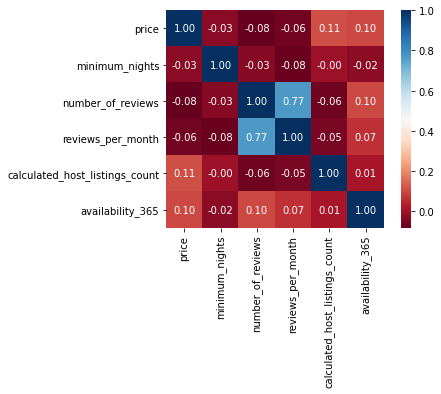

In [0]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

No mapa de calor acima podemos observar uma alta correlação entre as váriaveis `number_of_reviews`e `reviews_per_month` indicando a medição das mesmas caracteristicas de dados.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` demonstra qual o tipo de locação está disponivel no Airbnb, que é o espaço locado pelo anfritião através do site. No momento da realização dessa analise existem as seguintes opções:

* Entire home/Apt: Lugar Inteiro
* Private Room: Quarto Interiro/Privado
* Shared Room: Quarto Compartilhado
* Hotel Room: Hotel/Empresa de Hospitalidade profissional

Abaixo segue a quantidade de ocorrências encontradas por cada tipo de aluguel:

In [93]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17742
Private room        8691
Hotel room          1334
Shared room          231
Name: room_type, dtype: int64

In [94]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.633688
Private room       0.310415
Hotel room         0.047646
Shared room        0.008251
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Para identificarmos os bairro com as locações mais caras de Roma, utilizei a função `groupby()` comparando as variáveis `price`e `neighbourhoods`.

In [95]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              96.235571
XIII Aurelia                  77.844864
II Parioli/Nomentano          72.872624
XII Monte Verde               72.067431
XV Cassia/Flaminia            68.151697
X Ostia/Acilia                64.972756
XIV Monte Mario               63.221053
VIII Appia Antica             63.050441
VII San Giovanni/Cinecittà    62.836316
IX Eur                        62.061489
Name: price, dtype: float64

Observamos que as locações no bairro I Centro Storico tem um percentual aproximado de 20% maior que o segundo bairro com as locações mais caras que é XIII Aurelia. A região é uma das mais procuradas e movimentadas da cidade de Roma, onde há monumentos como Fontana de Trevi, Panteão e uma das ruas comerciais mais famosas da Italia a Via Del Corso.

Abaixo, segue os pontos no mapa de Roma onde das locações disponibilizadas no site do Airbnb.

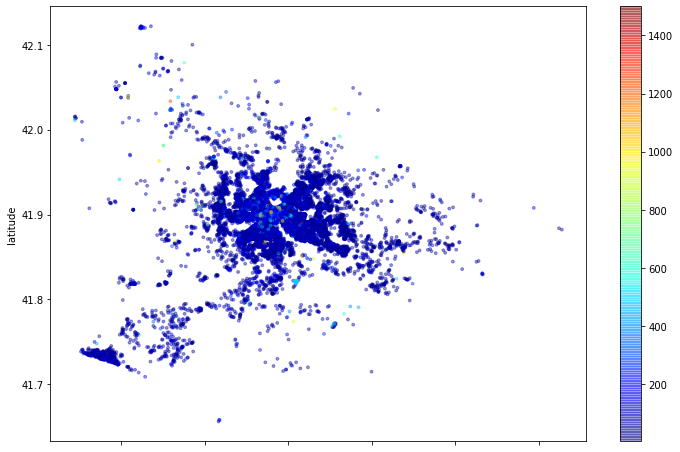

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Outro dado analisado neste conjunto é a média de noites disponiveis pelos anfritões para locação. Podemos observar que a média é de aproximadamente 1.86 dias, porém em mais de 75% dos dados deste dataset vimos que essa disponibilidade mínima chega a 2 dias.

In [97]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,27998.000000
mean,1.867955
std,0.935786
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,6.000000


## Conclusões

A analise apresentada foi feita de forma superficial na base de dados disponibilizada do Airbnb. Segue abaixo as minhas considerações:

* As variáveis `neighbourhood_group`, `reviews_per_month` e `last_review`possuem um alto percentual de valores ausentes;
* Foi identificado a presença de outilers nas variaveis `price`e `minimum_nights` onde foi realizada a limpeza do dataset para termos valores mais próximos a realidade apresentada
* A média de preço da diaria é de 81,40, sendo o I Centro Storico o bairro mais caro demonstrado no conjunto de dados com média de diaria 96,23
* A quantidade minima de noite para locação é na média de 1,87, sendo que em 75% do dataset os anfitriões disponibilizam o minimo de 2 Dias.

Observa-se que esse conjunto de dados analisado é uma versão resumida, ideal para uma abordagem inicial, ficando sugerido que o dataset completo seja usado para uma próxima analise exploratória.